#  State Value Estimation in Gridworld using Monte Carlo Algorithms

<img src="grid.png" alt="Gridworld with State Transition Dynamics" style="width: 400px;"/>

### Problem Statement

Given a Gridworld, policy and state-transition dynamics, estimate the state value function using first visit and every visit Monte Carlo Methods.

In this notebook, both the algorithms are implemented with table of value functions printed and plots for convergence plotted after state value estimation in each case.

### Import libraries

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

### Define Policy and State Transition Dynamics

In [2]:
def policy(state):
    if state in (1, 2):
        action = 'left'
    elif state in (3, 6):
        action = 'left' if np.random.uniform(0,1) > 0.5 else 'down'
    elif state in (4, 8):
        action = 'up'
    elif state in (5,):
        action = 'left' if np.random.uniform(0,1) > 0.5 else 'up'
    elif state in (7, 11):
        action = 'down'
    elif state in (9, 12):
        action = 'right' if np.random.uniform(0,1) > 0.5 else 'up'
    elif state in (10,):
        action = 'right' if np.random.uniform(0,1) > 0.5 else 'down'
    elif state in (13, 14):
        action = 'right'
    return action

def state_transition(state, action):
    transition_threshold = np.random.uniform(0, 1)
    done = False
    reward = -1
    if state in (1, 2) and action in ('left'):
        if transition_threshold > 0.9:
            state = state
        elif transition_threshold > 0.8:
            state = state + 1
        elif transition_threshold > 0.7:
            state = state + 4
        else:
            state = state - 1
    elif state in (3,) and action in ('left', 'down'):
        if transition_threshold > 0.8:
            state = state
        elif transition_threshold > 0.4:
            state = state + 4
        else:
            state = state - 1
    elif state in (4, 8) and action in ('up'):
        if transition_threshold > 0.9:
            state = state + 1
        elif transition_threshold > 0.8:
            state = state + 4
        elif transition_threshold > 0.7:
            state = state
        else:
            state = state - 4
    elif state in (5,) and action in ('left', 'up'):
        if transition_threshold > 0.9:
            state = state + 1
        elif transition_threshold > 0.8:
            state = state + 4
        elif transition_threshold > 0.4:
            state = state - 1
        else:
            state = state - 4
    elif state in (6,) and action in ('left', 'down'):
        if transition_threshold > 0.9:
            state = state - 4
        elif transition_threshold > 0.8:
            state = state + 1
        elif transition_threshold > 0.4:
            state = state + 4
        else:
            state = state - 1
    elif state in (7,11) and action in ('down'):
        if transition_threshold > 0.9:
            state = state - 1
        elif transition_threshold > 0.8:
            state = state - 4
        elif transition_threshold > 0.7:
            state = state
        else:
            state = state + 4
    elif state in (9,) and action in ('right', 'up'):
        if transition_threshold > 0.9:
            state = state - 4
        elif transition_threshold > 0.8:
            state = state - 1
        elif transition_threshold > 0.4:
            state = state - 4
        else:
            state = state + 1
    elif state in (10,) and action in ('right', 'down'):
        if transition_threshold > 0.9:
            state = state - 1
        elif transition_threshold > 0.8:
            state = state - 4
        elif transition_threshold > 0.4:
            state = state + 1
        else:
            state = state - 4
    elif state in (12,) and action in ('right', 'up'):
        if transition_threshold > 0.8:
            state = state
        elif transition_threshold > 0.4:
            state = state - 4
        else:
            state = state + 1
    elif state in (13, 14) and action in ('right'):
        if transition_threshold > 0.9:
            state = state
        elif transition_threshold > 0.8:
            state = state - 1
        elif transition_threshold > 0.7:
            state = state - 4
        else:
            state = state + 1
    else:
        raise ('Invalid (state, action) pair')
    if state in (0, 15):
        done = True
        reward = 0
    return state, reward, done
    

### Simulating using Policy and State Transition Dynamics

In [3]:
def dict_to_prop(d):
    d_prop = {k:v/sum(d.values()) for k,v in d.items()}
    return d_prop

In [4]:
def simulate_state_transition(state=None, num_simulations = 1000000):
    transitions = {s:[] for s in range(1, 15)}
    if state is None:
        state = 1 + np.random.choice(14)
    for _ in range(num_simulations):
        action = policy(state)
        next_state, _1, _2 = state_transition(state, action)
        transitions[state].append(next_state)
        if next_state in (0, 15):
            state = 1 + np.random.choice(14)
        else:
            state = next_state
    transition_counts = [(k, dict(Counter(transitions[k]))) for k in transitions]
    transition_prop = [(k, dict_to_prop(v)) for (k,v) in transition_counts]
    return transition_prop

In [5]:
# simulate_state_transition(num_simulations=100000)

### Implementation of State Value Estimation Monte Carlo Algorithm for First Visit & Every Visit

In [6]:
def monte_carlo_value_estimate(policy, states=range(1,15), gamma=0.95, episodes=70, first_visit=True):
    V = {s:[] for s in states}
    Returns = {s:[] for s in states}
    start_state = 1
    for episode in range(episodes):
        state = start_state
        episode_states = []
        episode_rewards = []
        done = False
#         print(start_state)
        while not done:
            action = policy(state)
            next_state, reward, done = state_transition(state, action)
            episode_states.append(state)
            episode_rewards.append(reward)
            state = next_state
        G = 0
        for step in range(len(episode_states)-1, -1, -1):
            state = episode_states[step]
            reward = episode_rewards[step]
            G = gamma*G + reward
            if first_visit:
                if state not in episode_states[:step]:
                    Returns[state].append(G)
                    V[state].append(np.mean(Returns[state]))
            else:
                Returns[state].append(G)
                V[state].append(np.mean(Returns[state]))
        if start_state == 14:
            start_state = 1
        else:
            start_state = start_state + 1
    return V

#### Define color palette for plotting

In [7]:
colors = ['#000000','#575757','#99182e','#116466','#333975','#5e73d1','#fd00ff','#ff7142',
          '#e3c5fd','#800080', '#00FF00', '#9398cf', '#ffcdf3', '#29d0d0', '#ff9233']

## State Value Estimation by First Visit Monte Carlo Algorithm

State 	 Value
1 	 -0.8495014333870056
2 	 -2.4929616362721343
3 	 -3.613217213975091
4 	 -0.8297667982698691
5 	 -2.341627601821224
6 	 -3.7016969559468214
7 	 -2.598491672997897
8 	 -2.494004282021408
9 	 -3.6537657578153024
10 	 -3.463107273904902
11 	 -0.9820489939993682
12 	 -3.6067432556391488
13 	 -2.594618946543726
14 	 -0.9369973342159272


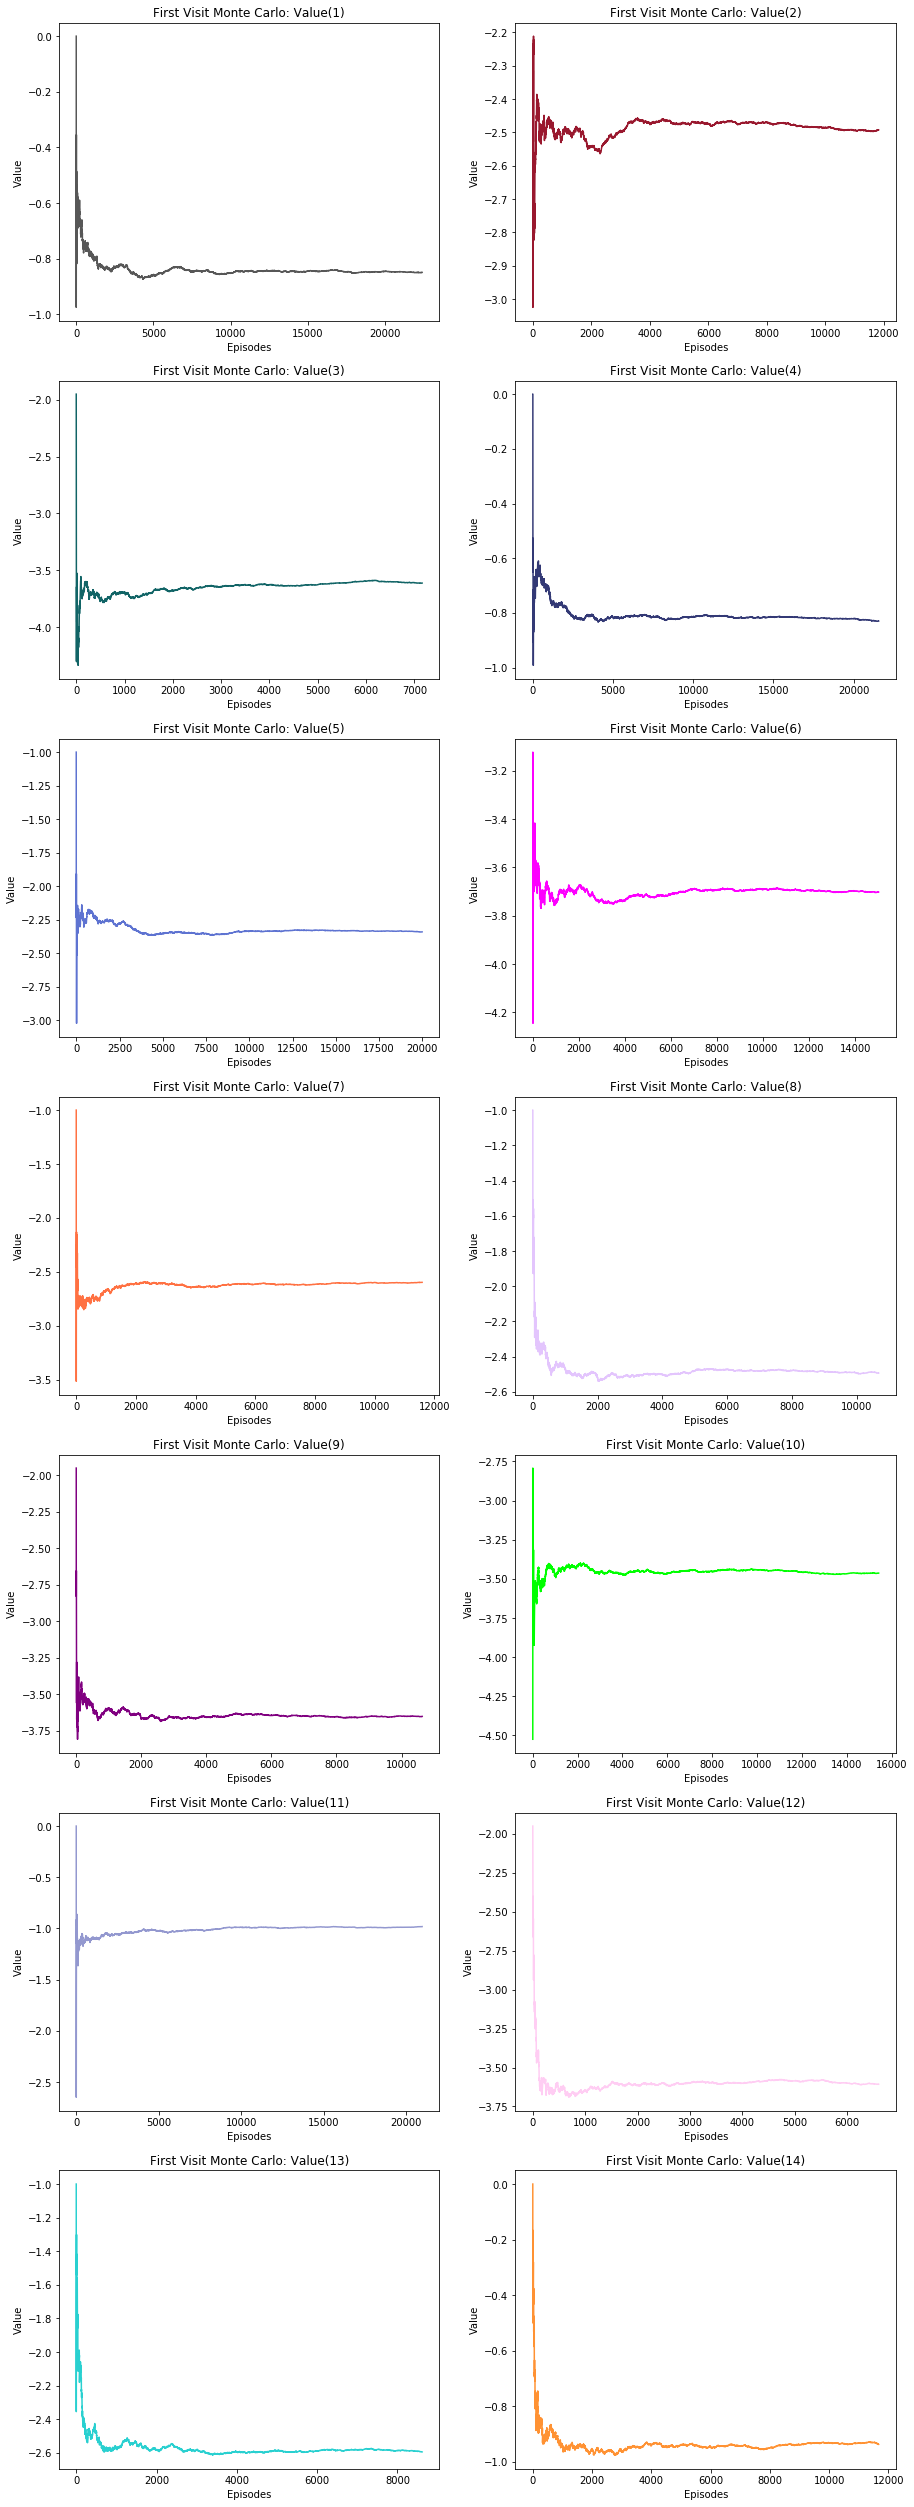

In [8]:
V = monte_carlo_value_estimate(policy, episodes=70000, first_visit=True)

print('State', '\t', 'Value')
for state in V:
    print(state, '\t', V[state][-1])

fig, axs = plt.subplots(7, 2,figsize=(15,45))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
for state in V:
    row = (state - 1) // 2
    column = (state - 1) % 2
    axs[row, column].plot(V[state], color=colors[state])
    axs[row, column].set(xlabel='Episodes', ylabel='Value')
    axs[row, column].set_title('First Visit Monte Carlo: Value({})'.format(state))


## State Value Estimation by Every Visit Monte Carlo Algorithm

State 	 Value
1 	 -0.8196963585583827
2 	 -2.45788835644569
3 	 -3.598509550227276
4 	 -0.8425191543119099
5 	 -2.313283896516369
6 	 -3.663714528098572
7 	 -2.540442600768425
8 	 -2.4801162575766624
9 	 -3.6223604440555657
10 	 -3.445924654773055
11 	 -0.946780417464184
12 	 -3.5517109688990534
13 	 -2.5819876490675333
14 	 -0.9780021689533016


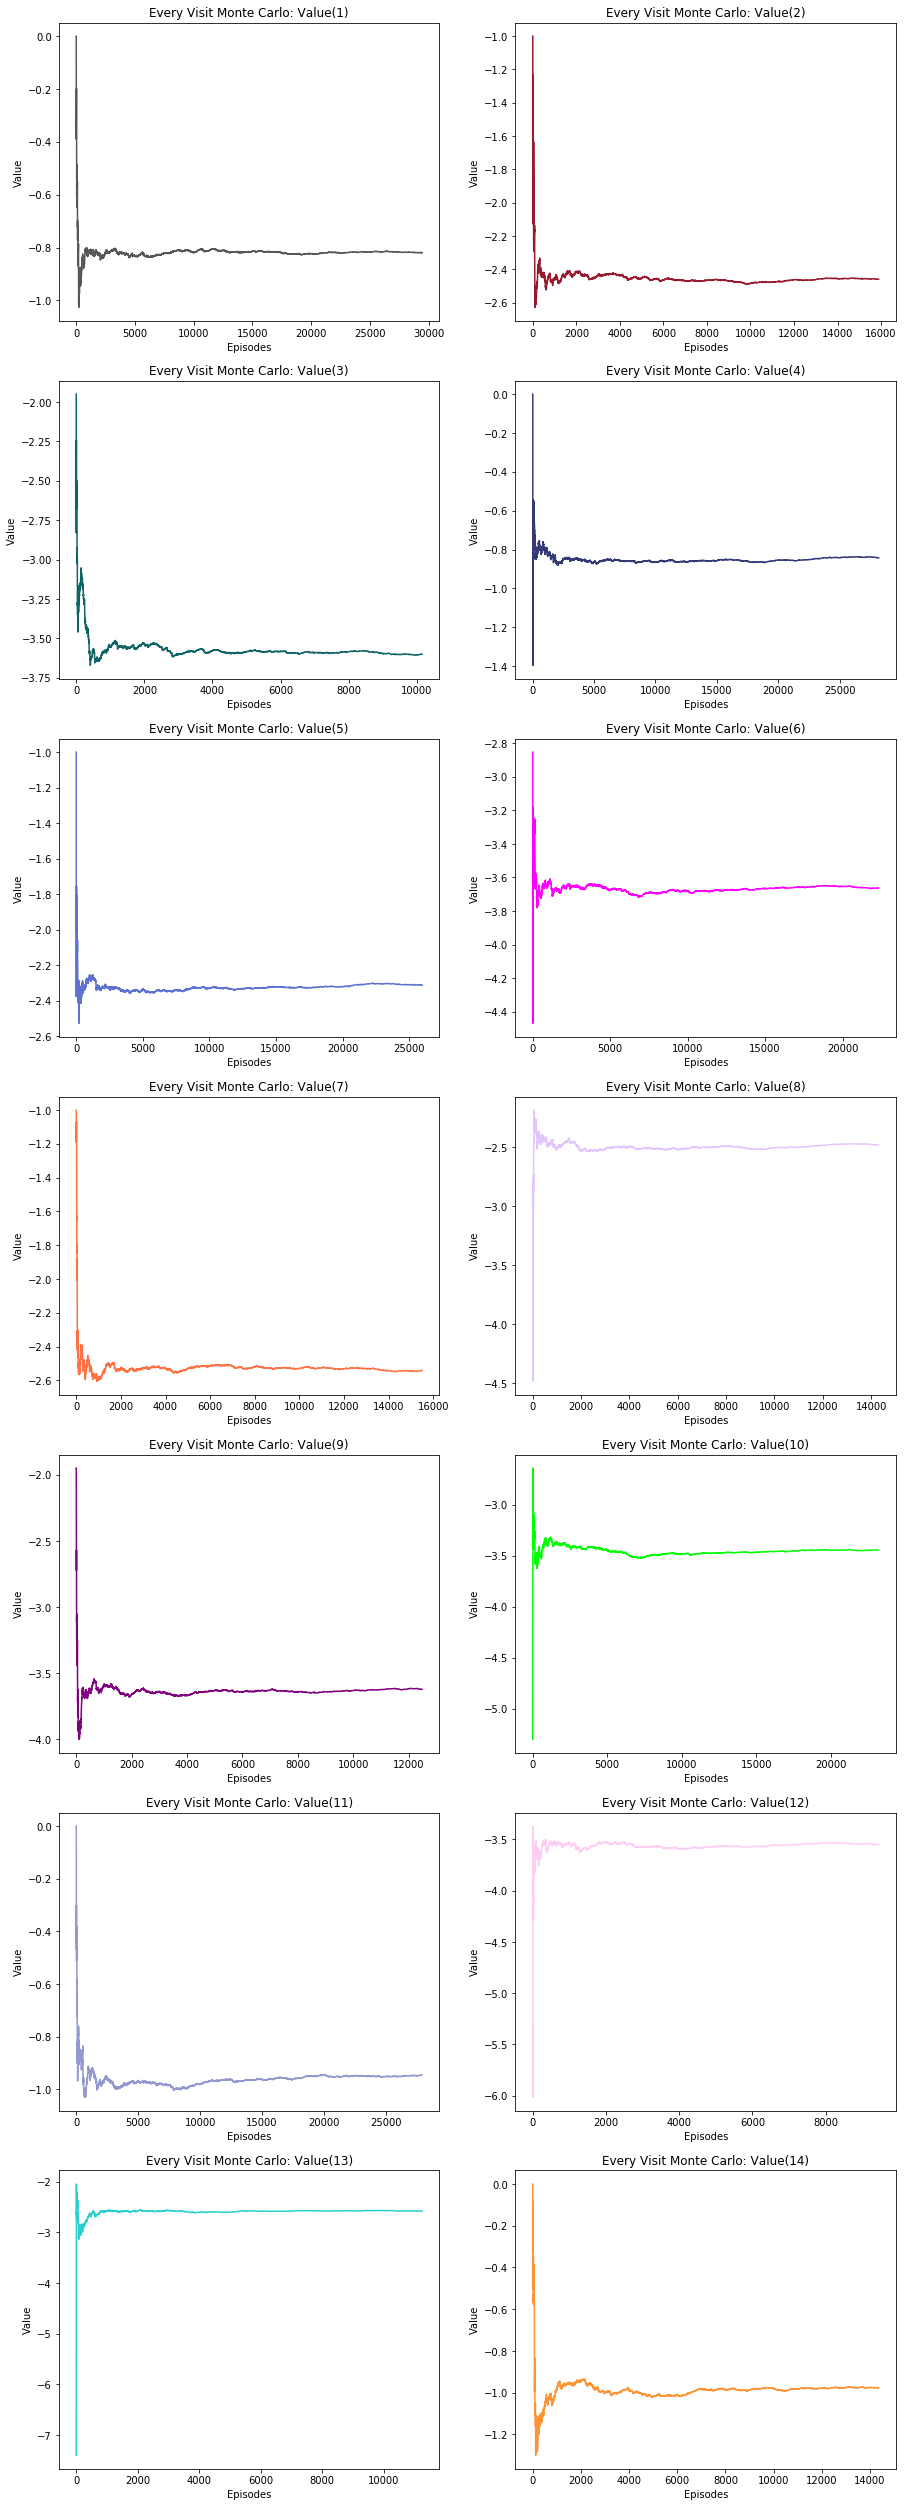

In [9]:
V = monte_carlo_value_estimate(policy, episodes=70000, first_visit=False)

print('State', '\t', 'Value')
for state in V:
    print(state, '\t', V[state][-1])

fig, axs = plt.subplots(7, 2,figsize=(15,45))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
for state in V:
    row = (state - 1) // 2
    column = (state - 1) % 2
    axs[row, column].plot(V[state], color=colors[state])
    axs[row, column].set(xlabel='Episodes', ylabel='Value')
    axs[row, column].set_title('Every Visit Monte Carlo: Value({})'.format(state))


### Conclusions:

1. States 1, 4, 11, 14 which are close to terminal states 0 and 15 converge at relatively higher state value estimates. Similarly states further from terminal states converge at relatively lower state value estimates.
2. The convergence pattern is similar in First Visit and Every Visit Monte Carlo methods for each state, except that they converge on slightly different values.
